# Economic Analysis Using Python with Fred API

## Project Scope

#### This project focus on extracting data from an economic forum site (fred International) to extract particular insights about unemployment Rate
##### Below is the Project Workflow
1. Import the Required libraries
2. Search fred api for economic data
3. Visualize the data
4. Drive Insights

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = None


color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
from fredapi import Fred



In [ ]:


color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
from fredapi import Fred



### 1.Create fred object

In [7]:
fred_api = "d68d0934a3238ed2c7184e212a2beef2"
fred = Fred(api_key=fred_api)

## 2.Search Fred

In [8]:
SP_search = fred.search('S&P',order_by='popularity')

In [9]:
SP_search.shape

(1000, 15)

In [10]:
SP_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-01-03,2025-01-03,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-01-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-01-03 10:46:08-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-01-03,2025-01-03,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-12-31 08:12:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-01-03,2025-01-03,S&P 500,2015-01-05,2025-01-02,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-01-02 19:11:41-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-01-03,2025-01-03,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-01-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-01-03 10:46:11-06:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-01-03,2025-01-03,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-01-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-01-03 10:52:02-06:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


In [11]:
#pull out the Raw Data
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P500'}>

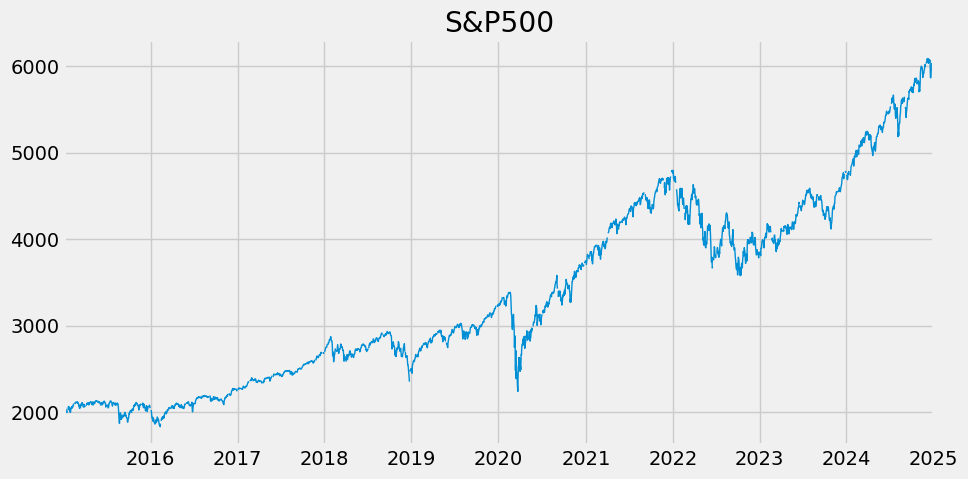

In [12]:
sp500.plot(figsize=(10,5),title='S&P500',lw=1)

##### From the line plot,we observe that the unemployment rate drastically drifted high from 2019 to 2025

In [13]:

#Pull and join multiple dataset
unemp_results = fred.search('unemployment')

In [14]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-01-03,2025-01-03,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:02-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-01-03,2025-01-03,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-12-06 07:46:03-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-01-03,2025-01-03,Unemployment Level,1948-01-01,2024-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-12-06 07:47:06-06:00,71,The series comes from the 'Current Population ...
NROU,NROU,2025-01-03,2025-01-03,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2025-01-03,2025-01-03,Continued Claims (Insured Unemployment),1967-01-07,2024-12-21,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-01-02 07:33:04-06:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2025-01-03,2025-01-03,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2025-01-03,2025-01-03,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2025-01-03,2025-01-03,Unemployment Rate - Married Women,1955-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:33-06:00,9,To obtain estimates of women worker employment...


In [16]:
unrate = fred.get_series('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-07-01    4.3
2024-08-01    4.2
2024-09-01    4.1
2024-10-01    4.1
2024-11-01    4.2
Length: 923, dtype: float64

<Axes: title={'center': 'Unemployment rate'}>

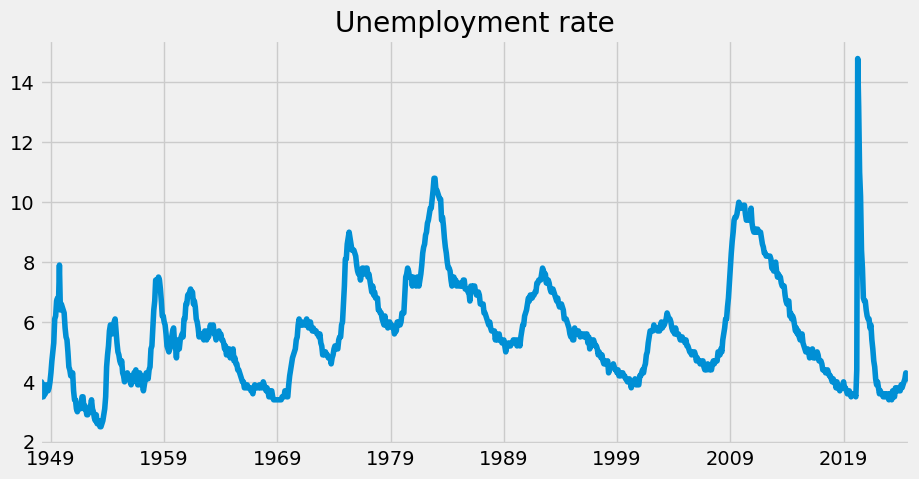

In [17]:
unrate.plot(figsize=(10,5),title='Unemployment rate')

In [18]:
unemp_df = fred.search('unemployment state', filter=('frequency','Monthly'))

In [19]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"')

In [20]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')].shape

(100, 15)

In [21]:
all_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [22]:
unemp_results = pd.concat(all_results,axis=1)

In [23]:
unemp_results

,UNRATE,LNS14000006,U6RATE,CAUR,M0892AUSM156SNBR,TXUR,LNS14000024,M0892BUSM156SNBR,LNS14000031,NYUR,U2RATE,FLUR,LNS14000002,LNS14000009,LNS14000003,PAUR,OHUR,LNS14000001,MIUR,U4RATE,LNS14027660,ALUR,LNS14027662,MAUR,LNS14024887,ILUR,NCUR,NJUR,GAUR,U1RATE,COUR,AZUR,WIUR,VAUR,KYUR,MNUR,SCUR,NMUR,LRUN64TTUSM156S,TNUR,LNS14032183,U5RATE,WAUR,MDUR,ORUR,LNS14000012,LNS14027659,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,NDUR,LASMT261982000000003,MTUR,DCUR,MSUR,LNS14000060,MEUR,NEUR,LNS14000028,CTUR,IDUR,LASMT391746000000003,NHUR,RIUR,KSUR,LNS13025703,LNS13023622,LNS14000018,WYUR,DEUR,VTUR,LNS14000036,SDUR,LNS13023706,LNS14000032,CMWRUR,LNS14200000,LRUN24TTUSM156S,LNS13023558,LNS13023654,LNS14027689,LNS14100000,LNS14000315,LNS13026511,LNS14000029,LNS14024230,CSOUUR,LRUNTTTTUSM156S,LNS14000025,LNS14000061,CNERUR,LNS14000048,CWSTUR,LNS14000026,LNS13008397,CNEWUR,LNS14000089,M08311USM156SNBR,LNS14000150,LNS13023570,M08320USM156SNBR,LNS14023705,LRHUTTTTUSM156S
1929-04-01,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,4.3,6.3,7.8,5.2,NaN,4.1,3.9,NaN,6.6,4.3,2.1,3.3,4.1,5.3,3.8,3.4,4.5,4.4,4.4,4.5,4.6,2.8,2.3,3.5,9.1,5.2,3.7,4.7,3.4,1.6,3.9,3.4,3.0,2.7,4.7,3.2,3.9,4.0,4.254796,3.0,3.7,5.1,4.9,2.8,4.1,12.4,6.7,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,5.8,4.0,3.9,2.9,2.2,4.5,3.1,5.5

In [24]:
column_list = unemp_results.columns.to_list()
print(column_list)

['UNRATE', 'LNS14000006', 'U6RATE', 'CAUR', 'M0892AUSM156SNBR', 'TXUR', 'LNS14000024', 'M0892BUSM156SNBR', 'LNS14000031', 'NYUR', 'U2RATE', 'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR', 'LNS14000001', 'MIUR', 'U4RATE', 'LNS14027660', 'ALUR', 'LNS14027662', 'MAUR', 'LNS14024887', 'ILUR', 'NCUR', 'NJUR', 'GAUR', 'U1RATE', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR', 'MNUR', 'SCUR', 'NMUR', 'LRUN64TTUSM156S', 'TNUR', 'LNS14032183', 'U5RATE', 'WAUR', 'MDUR', 'ORUR', 'LNS14000012', 'LNS14027659', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR', 'HIUR', 'NDUR', 'LASMT261982000000003', 'MTUR', 'DCUR', 'MSUR', 'LNS14000060', 'MEUR', 'NEUR', 'LNS14000028', 'CTUR', 'IDUR', 'LASMT391746000000003', 'NHUR', 'RIUR', 'KSUR', 'LNS13025703', 'LNS13023622', 'LNS14000018', 'WYUR', 'DEUR', 'VTUR', 'LNS14000036', 'SDUR', 'LNS13023706', 'LNS14000032', 'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS13023558', 'LNS13023654', 'LNS14027689', 'LNS14100000

In [25]:
#Retain only columns with exactly four digits
filtered_columns = [col for col in column_list if len(col) == 4]
unemp_states = unemp_results[filtered_columns]
unemp_states = unemp_states.dropna()
unemp_states

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,ILUR,NCUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,MNUR,SCUR,NMUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,NDUR,MTUR,DCUR,MSUR,MEUR,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.8,10.2,5.8,6.1,5.6,6.0,7.4,8.6,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.7,10.2,5.8,6.1,5.6,6.0,7.4,8.7,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.7,10.1,5.7,6.1,5.6,5.9,7.3,8.7,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,19.3,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.6,6.3,10.3,8.3,5.6,10.0,5.6,6.0,5.6,5.8,7.2,8.6,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,19.0,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.6,6.1,10.3,8.1,5.6,9.8,5.5,5.9,5.5,5.7,7.0,8.6,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,18.9,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,5.2,3.7,4.7,3.4,3.9,3.4,3.0,2.7,4.7,3.2,3.9,4.0,3.0,4.9,2.8,4.1,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,5.8,4.0,3.9,2.9,2.2,3.1,5.5,2.7,2.8,2.6,3.6,3.5,2.5,4.5,3.2,2.9,4.1,2.1,2.0
2024-08-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.8,3.7,5.3,3.8,4.8,3.6,4.0,3.4,2.9,2.8,4.8,3.3,4.3,4.1,3.1,4.8,2.9,4.0,4.2,5.5,3.3,3.4,3.9,4.6,2.9,3.3,5.7,4.2,3.9,2.9,2.3,3.2,5.7,2.7,2.8,2.7,3.4,3.5,2.6,4.6,3.3,3.0,4.2,2.2,2.0
2024-09-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.9,3.8,5.3,3.8,4.7,3.6,4.0,3.5,2.9,2.9,4.9,3.4,4.5,4.2,3.2,4.8,2.9,4.0,4.2,5.6,3.3,3.4,3.9,4.5,2.9,3.5,5.5,4.3,3.9,2.9,2.3,3.3,5.7,2.8,2.8,2.7,3.2,3.6,2.5,4.6,3.3,3.1,4.2,2.2,2.0
2024-10-01,5.4,4.1,4.4,3.3,3.4,4.3,4.6,2.9,3.9,5.3,3.7,4.7,3.6,4.1,3.6,2.9,2.9,5.0,3.4,4.7,4.3,3.3,4.7,3.0,4.0,4.2,5.7,3.3,3.3,3.8,4.6,3.0,3.5,5.4,4.4,4.1,2.9,2.4,3.3,5.7,2.9,2.9,2.7,3.0,3.7,2.5,4.6,3.4,3.2,4.0,2.3,1.9


In [26]:
px.line(unemp_states)

## Pull April 2020 Unemployment Rate Per State

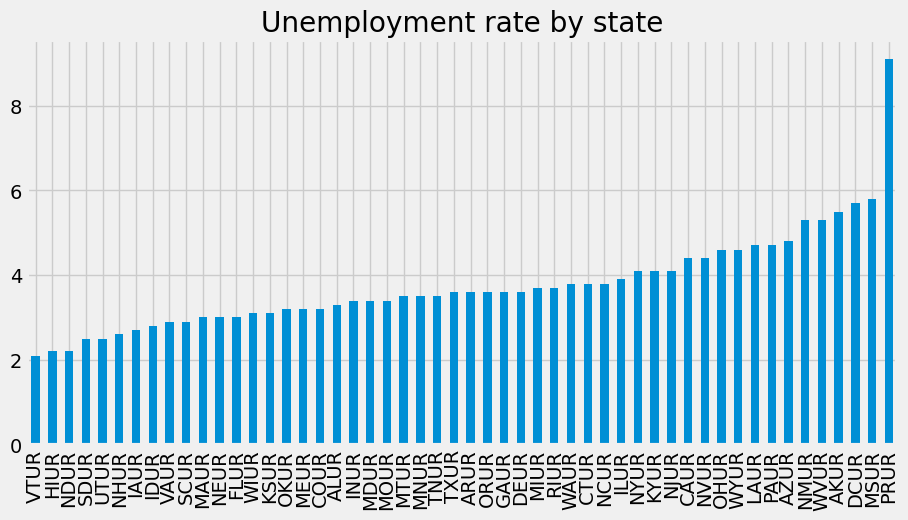

In [27]:
ax = unemp_states.loc[unemp_states.index == '2020-02-01'].T\
    .sort_values('2020-02-01')\
    .plot(kind='bar', figsize=(10,5), title='Unemployment rate by state')
ax.legend().remove()
plt.show()


In [28]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()

In [29]:
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [30]:
unemp_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,Illinois,North Carolina,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,Minnesota,South Carolina,New Mexico,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Puerto Rico,Indiana,Louisiana,Hawaii,North Dakota,Montana,the District of Columbia,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.8,10.2,5.8,6.1,5.6,6.0,7.4,8.6,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.7,10.2,5.8,6.1,5.6,6.0,7.4,8.7,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.7,10.1,5.7,6.1,5.6,5.9,7.3,8.7,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,19.3,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.6,6.3,10.3,8.3,5.6,10.0,5.6,6.0,5.6,5.8,7.2,8.6,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,19.0,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.6,6.1,10.3,8.1,5.6,9.8,5.5,5.9,5.5,5.7,7.0,8.6,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,18.9,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,5.2,3.7,4.7,3.4,3.9,3.4,3.0,2.7,4.7,3.2,3.9,4.0,3.0,4.9,2.8,4.1,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,5.8,4.0,3.9,2.9,2.2,3.1,5.5,2.7,2.8,2.6,3.6,3.5,2.5,4.5,3.2,2.9,4.1,2.1,2.0
2024-08-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.8,3.7,5.3,3.8,4.8,3.6,4.0,3.4,2.9,2.8,4.8,3.3,4.3,4.1,3.1,4.8,2.9,4.0,4.2,5.5,3.3,3.4,3.9,4.6,2.9,3.3,5.7,4.2,3.9,2.9,2.3,3.2,5.7,2.7,2.8,2.7,3.4,3.5,2.6,4.6,3.3,3.0,4.2,2.2,2.0
2024-09-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.9,3.8,5.3,3.8,4.7,3.6,4.0,3.5,2.9,2.9,4.9,3.4,4.5,4.2,3.2,4.8,2.9,4.0,4.2,5.6,3.3,3.4,3.9,4.5,2.9,3.5,5.5,4.3,3.9,2.9,2.3,3.3,5.7,2.8,2.8,2.7,3.2,3.6,2.5,4.6,3.3,3.1,4.2,2.2,2.0
2024-10-01,5.4,4.1,4.4,3.3,3.4,4.3,4.6,2.9,3.9,5.3,3.7,4.7,3.6,4.1,3.6,2.9,2.9,5.0,3.4,4.7,4.3,3.3,4.7,3.0,4.0,4.2,5.7,3.3,3.3,3.8,4.6,3.0,3.5,5.4,4.4,4.1,2.9,2.4,3.3,5.7,2.9,2.9,2.7,3.0,3.7,2.5,4.6,3.4,3.2,4.0,2.3,1.9


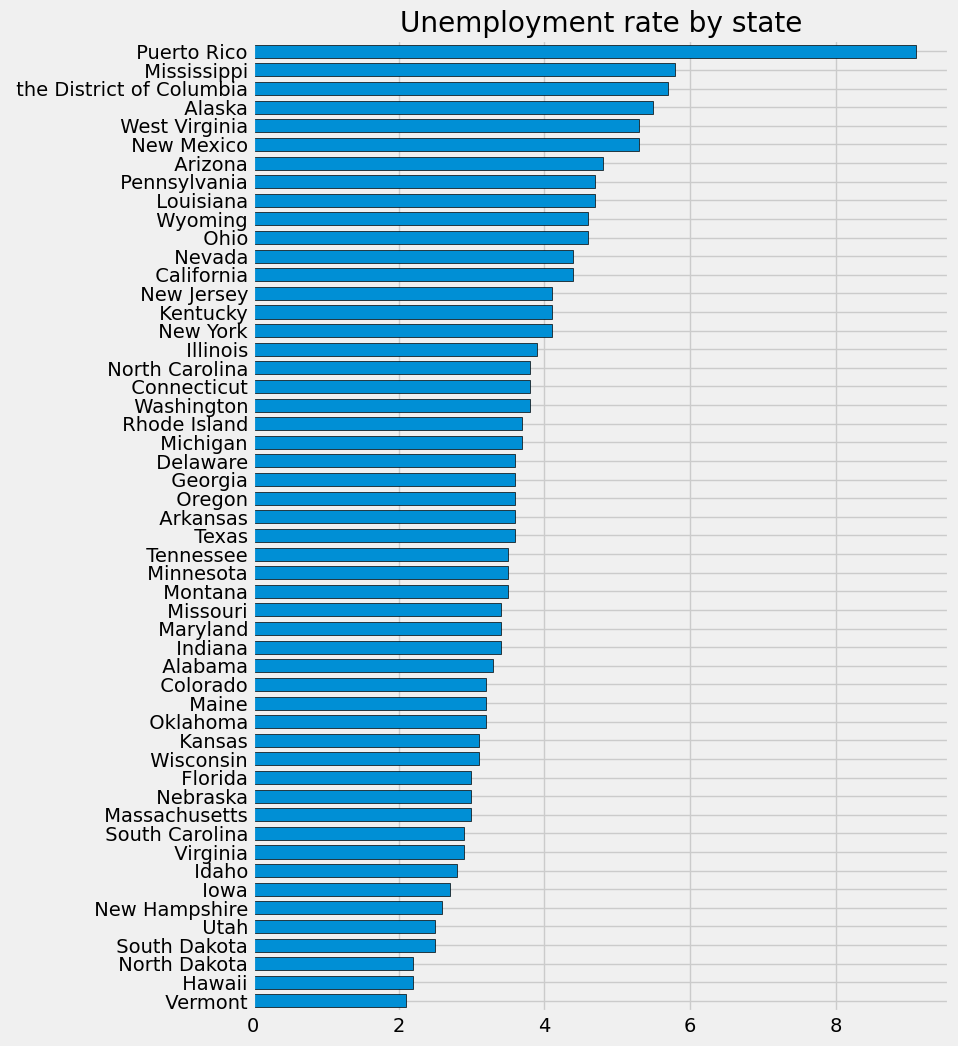

In [31]:
ax = unemp_states.loc[unemp_states.index == '2020-02-01'].T\
    .sort_values('2020-02-01')\
    .plot(kind='barh', figsize=(8,12),width=0.7,edgecolor='black', title='Unemployment rate by state')
ax.legend().remove()
plt.show()